<a href="https://colab.research.google.com/github/Geetanjally/NLP/blob/main/4_1_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### DF(Document Frequency) = Number of times term t is present in all docs
- The higher the frequency that means that word is not contributing as distinct features to determine the output


## What is TF-IDF?

- TF stands for **Term Frequency** and denotes the ratio of  number of times a particular word appeared in a Document to total number of words in the document.
          
         Term Frequency(TF) = [number of times word appeared / total no of words in a document]

- Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.


- IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

         Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
        
- In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.


- Finally:
         
         TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

### Limitations of TF-IDF
- As n increased dimensionally,sparsity increases
- Doesn't Capture Relationship Between the words
- Doesn't Address Out of vocabulary(OOV) problem

## Just Sample Demo

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Corpus: Collection of Document
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [4]:
tf = TfidfVectorizer() #tf-idf vectorizer it is a class and "tf" is the object of that class
tf.fit(corpus)
corpus_transform = tf.transform(corpus)
print(corpus_transform.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

In [5]:
print(tf.vocabulary_) #vocabulary_ is the attribute of the TfidfVectorizer class which contains the vocabulary of the corpus
#v.vocabulary_ is a dictionary where the keys are the words in the corpus and the values are the indices of the words in the feature matrix


{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [6]:
print(tf.get_feature_names_out())

['already' 'am' 'amazon' 'and' 'announcing' 'apple' 'are' 'ate' 'biryani'
 'dot' 'eating' 'eco' 'google' 'grapes' 'iphone' 'ironman' 'is' 'loki'
 'microsoft' 'model' 'new' 'pixel' 'pizza' 'surface' 'tesla' 'thor'
 'tomorrow' 'you']


In [7]:
#idf score with word
all_features_name = tf.get_feature_names_out()
for word in all_features_name:
    indx = tf.vocabulary_.get(word)
    idf_score = tf.idf_[indx]
    print(f"{word}: {idf_score}")

already: 2.386294361119891
am: 2.386294361119891
amazon: 2.386294361119891
and: 2.386294361119891
announcing: 1.2876820724517808
apple: 2.386294361119891
are: 2.386294361119891
ate: 2.386294361119891
biryani: 2.386294361119891
dot: 2.386294361119891
eating: 1.9808292530117262
eco: 2.386294361119891
google: 2.386294361119891
grapes: 2.386294361119891
iphone: 2.386294361119891
ironman: 2.386294361119891
is: 1.1335313926245225
loki: 2.386294361119891
microsoft: 2.386294361119891
model: 2.386294361119891
new: 1.2876820724517808
pixel: 2.386294361119891
pizza: 2.386294361119891
surface: 2.386294361119891
tesla: 2.386294361119891
thor: 2.386294361119891
tomorrow: 1.2876820724517808
you: 2.386294361119891


## Without Preprocessing text Train the model

In [8]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/O7_dataset/ecommerceDataset.csv")
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [9]:
df.columns = ["Products","Text"]
df.head()

,Products,Text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [10]:
df.isna().sum()

,0
Products,0
Text,4


In [11]:
df.dropna(inplace=True)
df.isna().sum()

,0
Products,0
Text,0


In [12]:
df.Products.value_counts()

,count
Products,
Household,19312
Books,11817
Electronics,10621
Clothing & Accessories,8670


- From the above, we can see that almost all the labels(classes) not occured equal number of times. There is a problem of class imbalance and hence need to apply balancing techniques like undersampling, oversampling etc.

In [13]:
df["label"]=df["Products"].map({"Household":0, "Books":1, "Electronics":2, "Clothing & Accessories":3})
df.head()

,Products,Text,label
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(df.Text, df.label, test_size=0.2, stratify=df.label, random_state=42)

In [15]:
type(X_train)

pandas.core.series.Series

In [16]:
type(X_train)

pandas.core.series.Series

In [17]:
type(y_train)

pandas.core.series.Series

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier())
    ])
model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3863
           1       0.96      0.95      0.95      2363
           2       0.95      0.95      0.95      2124
           3       0.97      0.97      0.97      1734

    accuracy                           0.96     10084
   macro avg       0.96      0.96      0.96     10084
weighted avg       0.96      0.96      0.96     10084



In [19]:
X_test[:5]

,Text
32503,Ahhaaaa Kids Indian Ethnic Collection Kurta an...
9667,"Eveready TGC4B Glass Top Gas Stove, 4 Burner G..."
22731,High School English Grammar and Composition Bo...
45808,Arctic Silver 5 Thermal Compound 3.5G The Arct...
16663,Finolex 1.5Sqmm Wire 90M Coil - Red Color name...


In [20]:
y_test[:5]

,label
32503,3
9667,0
22731,1
45808,2
16663,0


In [21]:
y_pred[:5]

array([3, 0, 1, 0, 0])

## MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("NB", MultinomialNB())
    ])
model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3863
           1       0.97      0.92      0.95      2363
           2       0.97      0.90      0.93      2124
           3       0.98      0.94      0.96      1734

    accuracy                           0.94     10084
   macro avg       0.96      0.94      0.94     10084
weighted avg       0.94      0.94      0.94     10084



## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("RF", RandomForestClassifier())
    ])
model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3863
           1       0.98      0.98      0.98      2363
           2       0.99      0.95      0.97      2124
           3       0.99      0.98      0.98      1734

    accuracy                           0.97     10084
   macro avg       0.98      0.97      0.97     10084
weighted avg       0.97      0.97      0.97     10084



# NOW model train with preprocessing Text

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    c=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        c.append(token.lemma_)
    return " ".join(c)

In [25]:
df["preprocessed_text"] = df["Text"].apply(preprocess)

In [26]:
df.head()

,Products,Text,label,preprocessed_text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,SAF Floral Framed Painting Wood 30 inch x 10 i...
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0,SAF UV Textured Modern Art Print Framed Painti...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0,SAF Flower Print Framed Painting Synthetic 13....
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0,Pitaara Box Romantic Venice Canvas Painting 6 ...


In [27]:
df.Text[0]

"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones)."

In [28]:
df.preprocessed_text[0]

'SAF Floral Framed Painting Wood 30 inch x 10 inch Special Effect UV Print Textured SAO297 Painting synthetic frame uv texture print give multi effect attract special series painting make wall beautiful give royal touch perfect gift special one'

In [29]:
X_train,X_test, y_train, y_test = train_test_split(df.preprocessed_text, df.label, test_size=0.2, stratify=df.label, random_state=42)

In [30]:
pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("RF", RandomForestClassifier())
    ])
model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.98      0.98      2363
           2       0.98      0.95      0.97      2124
           3       0.98      0.98      0.98      1734

    accuracy                           0.97     10084
   macro avg       0.98      0.97      0.97     10084
weighted avg       0.97      0.97      0.97     10084



If you compare above classification report with respect to **RandomForest Model** with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

## Plot Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[3805   22   20   16]
 [  40 2304   10    9]
 [  80   22 2018    4]
 [  35    3    3 1693]]


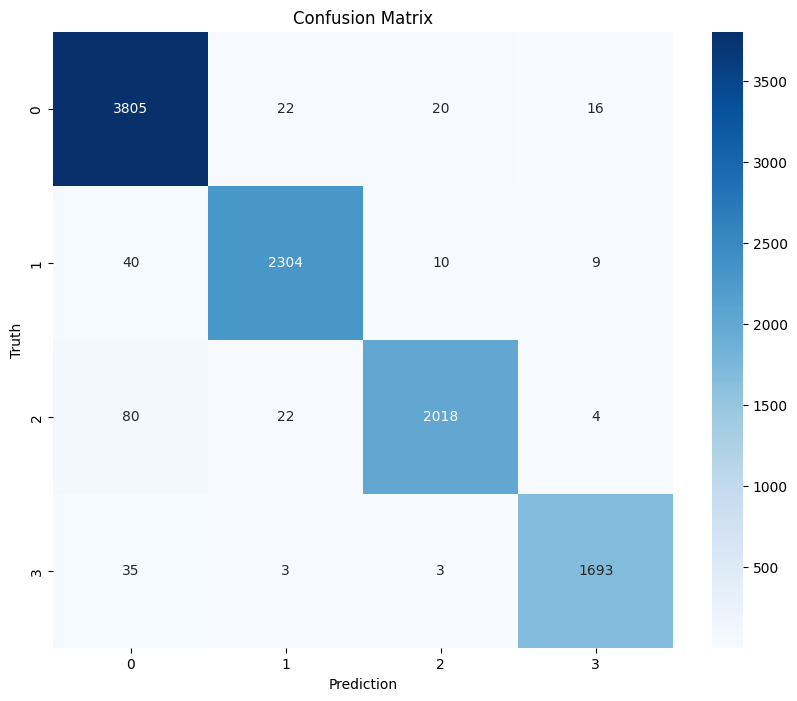

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()